In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/jaimesastrecrespo/Desktop/tracks_clean_kaggle.csv')

In [4]:
data = pd.get_dummies(df, columns=['time_signature', 'key', 'mode'], drop_first=True)

In [5]:

features = ["acousticness", "danceability", "duration", "energy", "instrumentalness", "key_1", "key_2", "key_3", "key_4", "key_5", "key_6", "key_7", "key_8", "key_9", "key_10", "key_11", "liveness", 
            "mode_1", "speechiness", "loudness", "tempo", "time_signature_1", "time_signature_3", "time_signature_4", "time_signature_5", "valence"]


In [6]:
data.shape

(526603, 37)

In [7]:

X = data[features]
y = data['popularity']

In [8]:
X.shape

(526603, 26)

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler()
# X_ros, y_ros = ros.fit_resample(X, y)

# print('Removed indexes:')

# print(X_ros.shape, y_ros.shape)


In [10]:
# ros = RandomUnderSampler()
# X_rus, y_rus = ros.fit_resample(X, y)

# print('Removed indexes:')

# print(X_rus.shape, y_rus.shape)

#### We need to define the feature selection, we can do it through the Random Forest Calssifier. 
* Random forests consist of 4 –12 hundred decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. 

In [11]:
#RandomForest for feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [12]:
# SFM = SelectFromModel(estimator=RandomForestClassifier())
# s = SFM.fit(X_rus, y_rus)

# n_features = s.transform(X_rus).shape[1]
# n_features

In [13]:
# # Get the 10 feature names 
# feature_idx = s.get_support()
# feature_name = X.columns[feature_idx]
# feature_name

In [14]:
# # Define our selected columns as our relevant features for modeling.
# X = X_rus.loc[: , feature_idx]

In [15]:
# y = y_rus

### We split the X and Y in test and train to use part of the data to train our model.  After we test our model to analyse how fits our model and decide if it is a good model or not.

* We oversample the data to balance our target variable, as it was so unbalanced.

In [16]:
#splitting and train and test
from sklearn.model_selection import train_test_split

In [17]:
# X_train, X_train, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=8)
# print(X_train.shape)
# print(y_train.shape)
# print(X_train.shape)
# print(y_test.shape)

In [18]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids 
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.2, 0.8], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

cc = ClusterCentroids(random_state=42)
X_res, y_res = cc.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 800, 0: 200})
Resampled dataset shape Counter({0: 200, 1: 200})


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.70, random_state=8)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(280, 20)
(280,)
(120, 20)
(120,)


# TPOT

In [20]:
data.corr()

,Unnamed: 0,popularity,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
Unnamed: 0,1.000000,-0.001186,0.024228,0.060018,0.131462,0.126469,0.059768,-0.113880,-0.131347,0.032280,...,-0.019684,0.007357,-0.013882,0.011138,0.003092,-0.005523,0.006840,-0.015083,0.013766,-0.024111
popularity,-0.001186,1.000000,0.218072,0.188015,0.300279,0.325545,-0.048010,-0.367835,-0.225770,-0.045251,...,-0.039021,0.008962,-0.031577,0.034158,-0.011753,0.002130,0.008970,-0.015052,0.037333,-0.038195
explicit,0.024228,0.218072,1.000000,0.152588,0.124583,0.136111,0.097406,-0.150452,-0.068409,-0.013802,...,-0.014906,-0.009760,-0.020167,0.029754,-0.014304,0.016980,-0.015784,0.010256,0.023881,-0.051707
danceability,0.060018,0.188015,0.152588,1.000000,0.239546,0.247517,0.204539,-0.240132,-0.225291,-0.102563,...,-0.037231,-0.023796,-0.007796,0.029733,-0.004471,0.008495,-0.009198,0.008997,0.031768,-0.044366
energy,0.131462,0.300279,0.124583,0.239546,1.000000,0.764564,-0.058809,-0.711486,-0.190010,0.126162,...,-0.066481,0.015028,-0.043848,0.032468,-0.003348,-0.012092,0.033962,-0.024502,0.058506,-0.065930
loudness,0.126469,0.325545,0.136111,0.247517,0.764564,1.000000,-0.176345,-0.515712,-0.322586,0.028992,...,-0.038080,0.011867,-0.027556,0.025032,-0.003416,-0.005255,0.021383,-0.015358,0.039113,-0.041621
speechiness,0.059768,-0.048010,0.097406,0.204539,-0.058809,-0.176345,1.000000,0.072514,-0.108308,0.214686,...,-0.013082,-0.040052,-0.004519,0.036479,-0.020914,0.031077,-0.031564,0.008602,0.018594,-0.016855
acousticness,-0.113880,-0.367835,-0.150452,-0.240132,-0.711486,-0.515712,0.072514,1.000000,0.196621,-0.005281,...,0.084130,-0.015562,0.059987,-0.032504,-0.000205,0.023281,-0.041343,0.035829,-0.063397,0.059094
instrumentalness,-0.131347,-0.225770,-0.068409,-0.225291,-0.190010,-0.322586,-0.108308,0.196621,1.000000,-0.043857,...,0.030361,-0.011973,0.014545,-0.007432,-0.002506,0.010826,-0.019078,0.017702,-0.015142,-0.010453
liveness,0.032280,-0.045251,-0.013802,-0.102563,0.126162,0.028992,0.214686,-0.005281,-0.043857,1.000000,...,-0.019236,0.012237,0.003988,-0.001548,0.010614,-0.011900,-0.009321,-0.013748,0.008606,0.008361


In [21]:
# check tpot version
import tpot
from tpot import TPOTClassifier
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


In [22]:
# It will return the best model according to your calculations.
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9928571428571429

Generation 2 - Current best internal CV score: 0.9928571428571429

Generation 3 - Current best internal CV score: 0.9928571428571429

Generation 4 - Current best internal CV score: 0.9928571428571429

Generation 5 - Current best internal CV score: 0.9964285714285716

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.1, min_samples_leaf=15, min_samples_split=18, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [23]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [24]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
    


The accuracy of the Random Forest Classifier is: 100.0 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        59

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



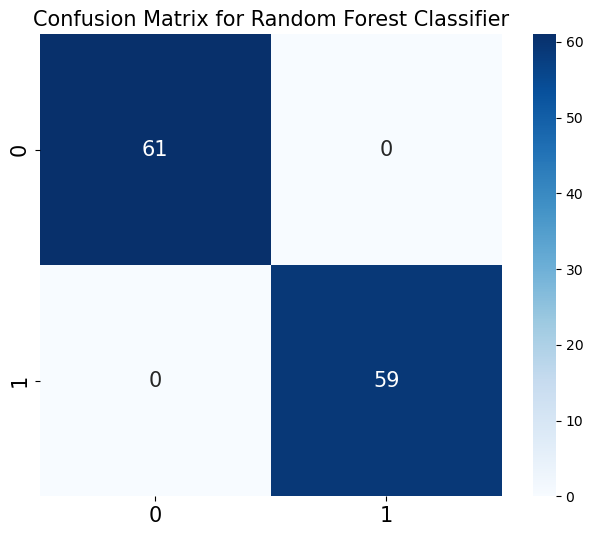

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred_rfc, 'Random Forest Classifier')

In [26]:
print(metrics.roc_auc_score(y_test,y_pred_rfc))

1.0


In [27]:
X_train

array([[-0.14368323, -0.52082434,  0.79179625, ...,  1.10252323,
        -0.06355505, -1.43687489],
       [ 0.49596139, -0.22913156, -1.16120882, ..., -0.93673017,
        -0.31618399, -1.1013953 ],
       [-0.26171038,  0.22823693,  1.32064688, ...,  1.76789822,
         1.14166524, -1.99198611],
       ...,
       [ 0.82100581, -0.56957358,  0.21108602, ...,  0.2411182 ,
         0.51674781, -1.29603582],
       [-1.03354941,  0.49219625,  1.48531187, ..., -1.23753067,
         0.19904552, -1.20167733],
       [-0.82854507,  0.5693389 ,  1.19314569, ..., -0.87615619,
         0.43835432, -1.45832176]])

# KNN

In [28]:

# Your code here:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

------------- 1 -------------------
[[60  1]
 [ 2 57]]  
Accuracy: 0.975
------------- 2 -------------------
[[61  0]
 [ 4 55]]  
Accuracy: 0.9666666666666667
------------- 3 -------------------
[[61  0]
 [ 1 58]]  
Accuracy: 0.9916666666666667
------------- 4 -------------------
[[61  0]
 [ 3 56]]  
Accuracy: 0.975
------------- 5 -------------------
[[61  0]
 [ 0 59]]  
Accuracy: 1.0
------------- 6 -------------------
[[61  0]
 [ 1 58]]  
Accuracy: 0.9916666666666667
------------- 7 -------------------
[[61  0]
 [ 0 59]]  
Accuracy: 1.0
------------- 8 -------------------
[[61  0]
 [ 1 58]]  
Accuracy: 0.9916666666666667
------------- 9 -------------------
[[61  0]
 [ 1 58]]  
Accuracy: 0.9916666666666667
------------- 10 -------------------
[[61  0]
 [ 2 57]]  
Accuracy: 0.9833333333333333
------------- 11 -------------------
[[61  0]
 [ 1 58]]  
Accuracy: 0.9916666666666667
------------- 12 -------------------
[[61  0]
 [ 1 58]]  
Accuracy: 0.9916666666666667
------------- 13 ----

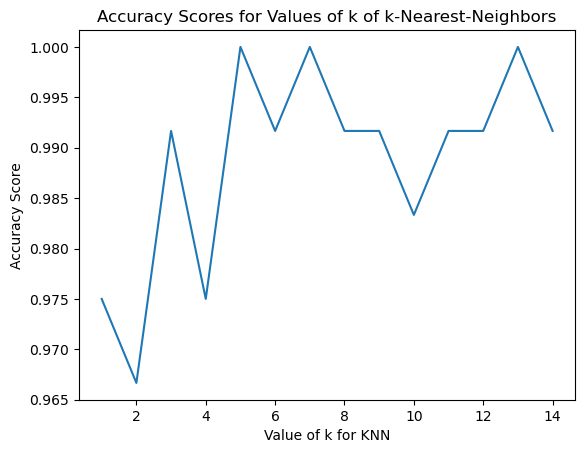

In [29]:
#instead of k=3, I will try to see what is the optimal no. of k using k_range loop
k_range = list(range(1,15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred),' \nAccuracy:', metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [30]:
# Your code here:

#well, according to the task, I will train the model where k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
scores.append(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred),' \nAccuracy:', metrics.accuracy_score(y_test, y_pred))

# conclusion as cell above

[[61  0]
 [ 1 58]]  
Accuracy: 0.9916666666666667


In [31]:
print(metrics.roc_auc_score(y_test,y_pred_knn))

1.0


# --------------BaggingClassifier----------------------------

In [33]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#
bgclassifier = BaggingClassifier( n_estimators=20,
                                 max_features=0.25,
                                 max_samples=20,
                                 random_state=1, n_jobs=-1)
#
# Fit the bagging classifier
#
bgclassifier.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Model test Score: 0.908,  Model training Score: 0.975
